In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.rename(columns = {"race/ethnicity": "race", "parental level of education": "parental_level_of_education", "test preparation course": "test_preparation_course", "math score": "math_score", "reading score":"reading_score", "writing score": "writing_score"}, inplace=True)

I renamed some columns adding underscores to make it easier to select them when writing code

In [7]:
df.head()

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.isna().mean()

gender                         0.0
race                           0.0
parental_level_of_education    0.0
lunch                          0.0
test_preparation_course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64

there are no missing values in the dataset

In [9]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

I checked the gender column to see if there were wrong entries.

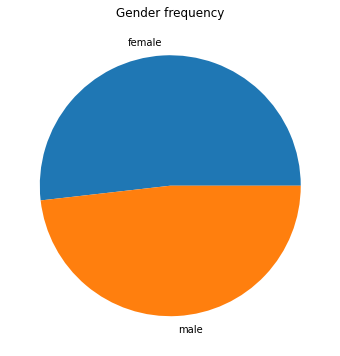

In [10]:
fig, ax = plt.subplots(figsize = (8,6))
_ax = plt.pie(x = df.gender.value_counts().values, labels = ["female", "male"])
_ax = plt.title("Gender frequency")

In [11]:
df.race.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race, dtype: int64

We have 5 races in the dataset. Unfortunately there's no information regarding which race stands for what so I will keep referring to the races as race A,B,C,D,E

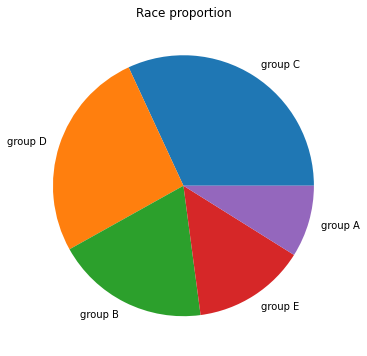

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
_ax = plt.pie(x = df.race.value_counts().values, labels = ["group C", "group D", "group B", "group E", "group A"])
_ax = plt.title("Race proportion")

In [13]:
df.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

quick check on the "parental level of education" variable for data quality purposes. There are 6 different levels of education.

In [14]:
df.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

Again, quick check on the "lunch" variable always for data quality purposes.
Two different values for the lunch variable: standard and free/reduced

In [15]:
df.test_preparation_course.value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

Always, check for data quality purposes. Two different values for the variable "test preparation course": none and completed

In [16]:
df.head()

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df.math_score.describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

the average match score is 66. The median math score is also 66. The minimum score is 0 (it should be investigated...is it correct? or is it a mistake?)

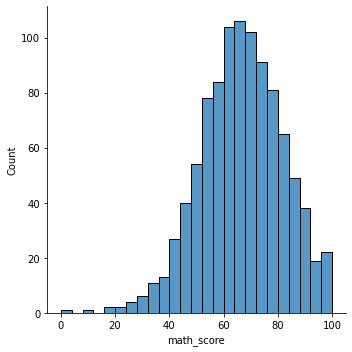

In [18]:
sns.displot(df.math_score)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution math score')

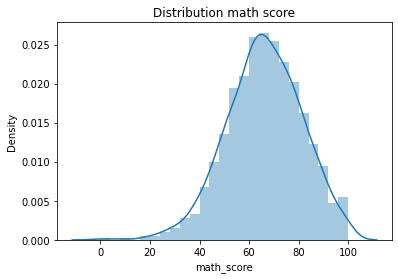

In [19]:
sns.distplot(a = df.math_score)
plt.title("Distribution math score")


Text(0.5, 1.0, 'Boxplot math score')

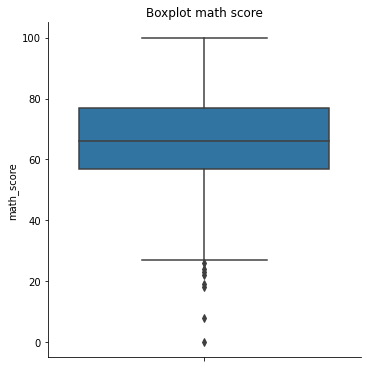

In [20]:
sns.catplot(y = "math_score", data=df, kind = "box")
plt.title("Boxplot math score")

From the boxplot we can see that there are some outliers (botto part). It should be investigated whether those values are correct or not

it could be now interesting to see how the math score distribution changes taking into consideration the gender for example and the race.

In [21]:
df.groupby("gender").math_score.agg(func= ["mean","median","max","min"])

,mean,median,max,min
gender,,,,
female,63.633205,65,100,0
male,68.728216,69,100,27


It looks like male are better in math compared to female

Text(0.5, 1.0, 'Boxplot math score by gender')

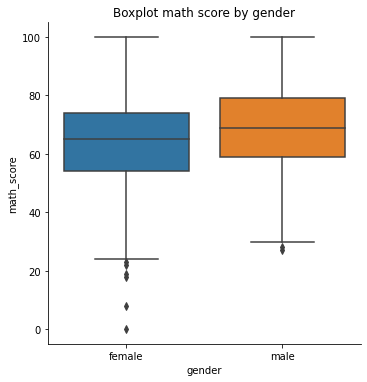

In [22]:
sns.catplot(x = "gender", y = "math_score", data=df, kind = "box")
plt.title("Boxplot math score by gender")

the difference could be realated to the presence of outliers in the female values

Text(0.5, 1.0, 'Violin plot math score by gender')

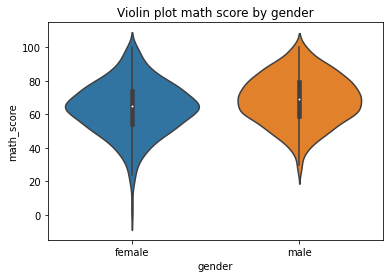

In [23]:
sns.violinplot(x = "gender", y = "math_score", data=df)
plt.title("Violin plot math score by gender")

Let's now have a look at the math score considering race

In [24]:
df.groupby("race").math_score.agg(func= ["mean","median","max","min"])

,mean,median,max,min
race,,,,
group A,61.629213,61.0,100,28
group B,63.452632,63.0,97,8
group C,64.463950,65.0,98,0
group D,67.362595,69.0,100,26
group E,73.821429,74.5,100,30


It looks like those belonging to group E are the best while those belonging to group A are the worst

Text(0.5, 1.0, 'Boxplot math score by race')

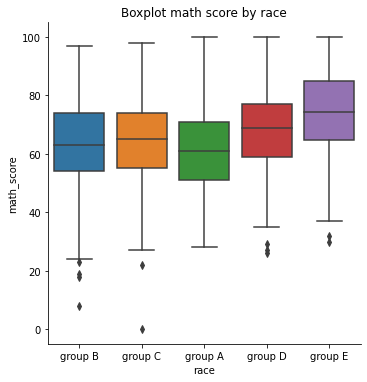

In [25]:
sns.catplot(x = "race", y = "math_score", data=df, kind = "box")
plt.title("Boxplot math score by race")

Text(0.5, 1.0, 'Violin plot math score by race')

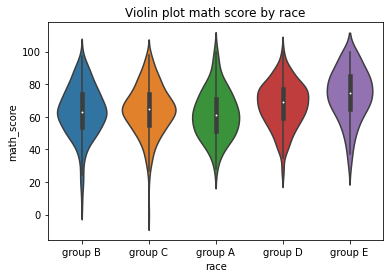

In [26]:
sns.violinplot(x = "race", y = "math_score", data=df)
plt.title("Violin plot math score by race")

sns.violinplot(x = "race", y = "math_score", data=df)
plt.title("Violin plot math score by race")

Finally let's keep examining the math score taking into consideration lunch and whether a test preparation course has been undertaken

In [27]:
df.groupby("lunch").math_score.agg(func = ["mean", "median", "max", "min"])

,mean,median,max,min
lunch,,,,
free/reduced,58.921127,60,100,0
standard,70.034109,69,100,19


Those with a standard lunch have a better score on average

In [28]:
df.groupby("test_preparation_course").math_score.agg(func = ["mean", "median", "max", "min"])

,mean,median,max,min
test_preparation_course,,,,
completed,69.695531,69,100,23
none,64.077882,64,100,0


Also, those who undertook a test preparation course have a better score on average

BRIEF RECAP FINDINGS MATH SCORE:  Male seem to be better than female, people belonging to group E have the best score on average, those with a standard lunch have better grades on average and having undertaken an exam preparation course is also associated with better grades

Now I will carry out the same analyses I did for the math score for the remaining two quantitative variables: reading score and writing score

Let's start from the reading score variable

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution reading score')

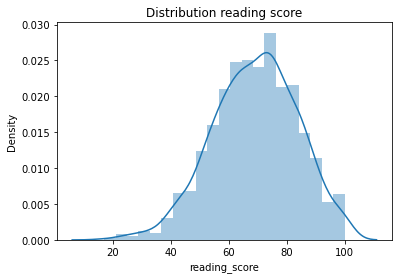

In [29]:
sns.distplot(a = df.reading_score)
plt.title("Distribution reading score")

Text(0.5, 1.0, 'Boxplot reading score')

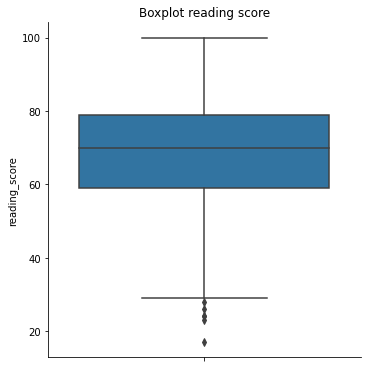

In [30]:
sns.catplot(y = "reading_score", data=df, kind = "box")
plt.title("Boxplot reading score")

Also for the reading score variable we can find some outliers...these should be analyzed to understand whether they are correct or wrong values

In [31]:
df.groupby("gender").reading_score.agg(func= ["mean","median","max","min"])

,mean,median,max,min
gender,,,,
female,72.608108,73,100,17
male,65.473029,66,100,23


It looks like female are better than male in reading

Text(0.5, 1.0, 'Boxplot reading score by gender')

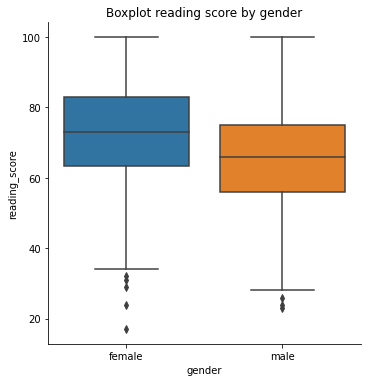

In [32]:
sns.catplot(x = "gender", y = "reading_score", data=df, kind = "box")
plt.title("Boxplot reading score by gender")

Text(0.5, 1.0, 'Violin plot reading score by gender')

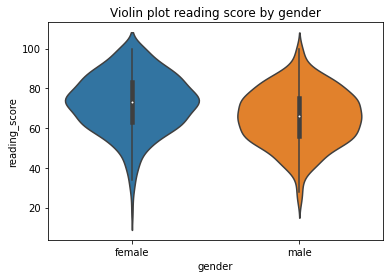

In [33]:
sns.violinplot(x = "gender", y = "reading_score", data=df)
plt.title("Violin plot reading score by gender")

In [34]:
df.groupby("race").reading_score.agg(func= ["mean","median","max","min"])

,mean,median,max,min
race,,,,
group A,64.674157,64,100,23
group B,67.352632,67,97,24
group C,69.103448,71,100,17
group D,70.030534,71,100,31
group E,73.028571,74,100,26


Again, those belonging to group E have the highest score on average while those belonging to group A have the lowest score on average

Text(0.5, 1.0, 'Boxplot reading score by race')

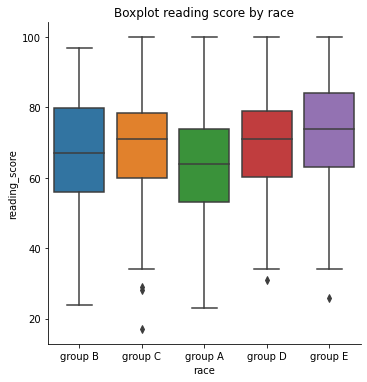

In [35]:
sns.catplot(x = "race", y = "reading_score", data=df, kind = "box")
plt.title("Boxplot reading score by race")

Text(0.5, 1.0, 'Violin plot reading score by race')

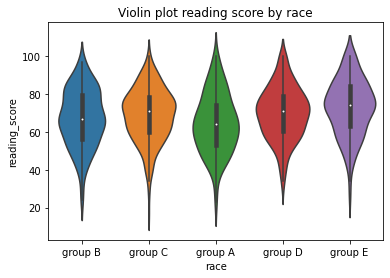

In [36]:
sns.violinplot(x = "race", y = "reading_score", data=df)
plt.title("Violin plot reading score by race")

In [37]:
df.groupby("lunch").reading_score.agg(func = ["mean", "median", "max", "min"])

,mean,median,max,min
lunch,,,,
free/reduced,64.653521,65,100,17
standard,71.654264,72,100,26


Those with a standard meal have a higher score on average (we obtained the same result for the math score....having a standard lunch seems to lead to better grades)

In [38]:
df.groupby("test_preparation_course").reading_score.agg(func = ["mean", "median", "max", "min"])

,mean,median,max,min
test_preparation_course,,,,
completed,73.893855,75,100,37
none,66.534268,67,100,17


Again those who completed a test preparation course got a better grade on average (same result obtained for the math score...it seems that undertaking a test preparation course leads to better grades)

BRIEF RECAP FINDINGS READING SCORE:  Female seem to be better than male, people belonging to group E have the best score on average, those with a standard lunch have better grades on average and having undertaken an exam preparation course is also associated with better grades (more or less same findings of the math score...the only difference is that female are better than male in reading while male are better than female in math)

Finally let's analyze the writing score (again I will carry out same analyses performed for the other two quantitative variables)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution writing score')

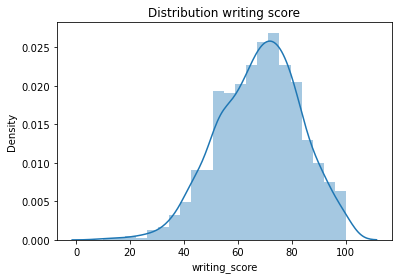

In [39]:
sns.distplot(a = df.writing_score)
plt.title("Distribution writing score")

Text(0.5, 1.0, 'Boxplot reading score')

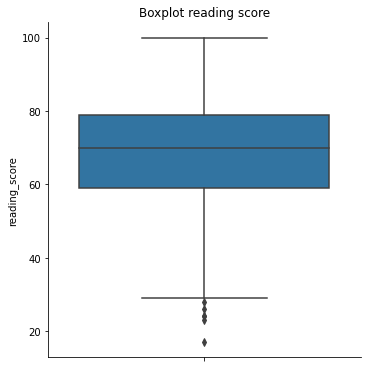

In [40]:
sns.catplot(y = "reading_score", data=df, kind = "box")
plt.title("Boxplot reading score")

Again, some outliers can be found (more analysis required)

In [41]:
df.groupby("gender").writing_score.agg(func= ["mean","median","max","min"])

,mean,median,max,min
gender,,,,
female,72.467181,74,100,10
male,63.311203,64,100,15


It looks like female are better than male in writing (actually it is something I was expecting considering they are better than male in reading)

Text(0.5, 1.0, 'Boxplot writing score by gender')

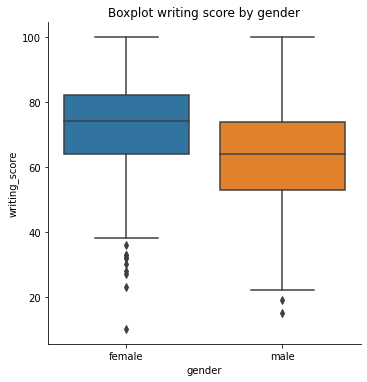

In [42]:
sns.catplot(x = "gender", y = "writing_score", data=df, kind = "box")
plt.title("Boxplot writing score by gender")

Text(0.5, 1.0, 'Violin plot writing score by gender')

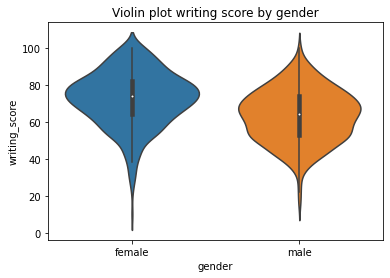

In [43]:
sns.violinplot(x = "gender", y = "writing_score", data=df)
plt.title("Violin plot writing score by gender")

In [44]:
df.groupby("race").writing_score.agg(func= ["mean","median","max","min"])

,mean,median,max,min
race,,,,
group A,62.674157,62,97,19
group B,65.600000,67,96,15
group C,67.827586,68,100,10
group D,70.145038,72,100,32
group E,71.407143,72,100,22


Again, those belonging to group E have the best score on average (those belonging to group E have the best score on average for all kinds of exam while those belonging to group A have the lowest score on average for all the three exams)

Text(0.5, 1.0, 'Boxplot writing score by race')

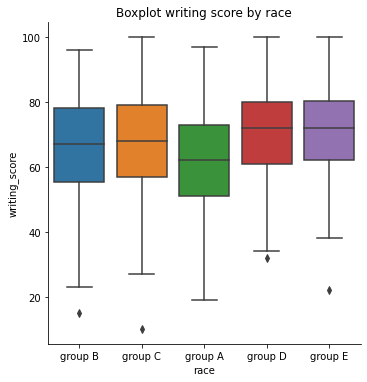

In [45]:
sns.catplot(x = "race", y = "writing_score", data=df, kind = "box")
plt.title("Boxplot writing score by race")

Text(0.5, 1.0, 'Violin plot writing score by race')

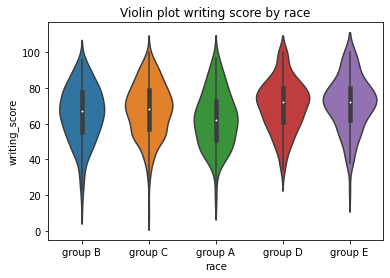

In [46]:
sns.violinplot(x = "race", y = "writing_score", data=df)
plt.title("Violin plot writing score by race")

In [47]:
df.groupby("lunch").writing_score.agg(func = ["mean", "median", "max", "min"])

,mean,median,max,min
lunch,,,,
free/reduced,63.022535,64,100,10
standard,70.823256,72,100,22


Again, having a standard lunch leads to a better score on average

In [48]:
df.groupby("test_preparation_course").writing_score.agg(func = ["mean", "median", "max", "min"])

,mean,median,max,min
test_preparation_course,,,,
completed,74.418994,76,100,36
none,64.504673,65,100,10


Also, having completed a test preparation course leads to a better score on average (same for the other two types of exams)

BRIEF RECAP FINDINGS WRITING SCORE:  Female seem to be better than male, people belonging to group E have the best score on average, those with a standard lunch have better grades on average and having undertaken an exam preparation course is also associated with better grades (same findings we got for the reading variable)

FINAL RECAP: it seems that male are better than female in math but female seem better than male in reading and writing

Those belonging to group E have the best score on average among the 3 exams while those belonging to group A have the lowest score on average for all the three exams

Having a standard lunch is associated with a better score on average for all the three exams

Taking an exam preparation course is associated with a better score on average for all the three exams

NOW LET'S GET MORE INFORMATION ABOUT CORRELATION BETWEEN THE THREE EXAMS
I will perform correlation analyses

In [51]:
df.corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


Text(0.5, 1.0, 'Correlation matrix')

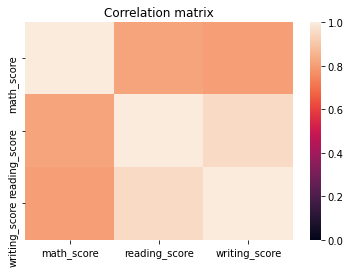

In [72]:
sns.heatmap(df.corr(),vmin = 0, vmax=1)
plt.title("Correlation matrix")

We can see that there is a very strong and positive correlations between the three exams
In particular higher socres in one exam are also associated with higher scores in the other exams

Text(0.5, 1.0, 'Scatter plot between math score and reading score ')

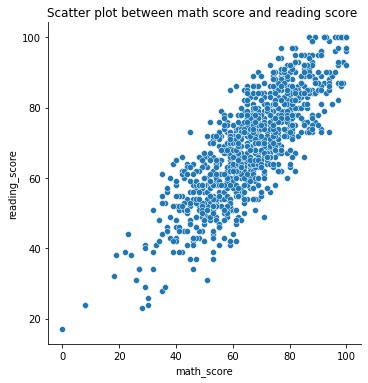

In [53]:
sns.relplot(x = "math_score", y = "reading_score", data=df)
plt.title("Scatter plot between math score and reading score ")

Text(0.5, 1.0, 'Scatter plot between math score and reading score by gender')

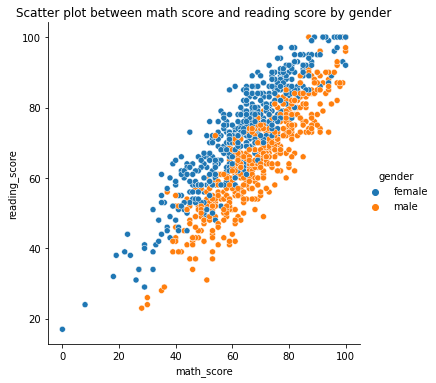

In [63]:
sns.relplot(x = "math_score", y = "reading_score", data=df, hue="gender")
plt.title("Scatter plot between math score and reading score by gender")

Text(0.5, 1.0, 'Scatter plot between math score and reading score by lunch type')

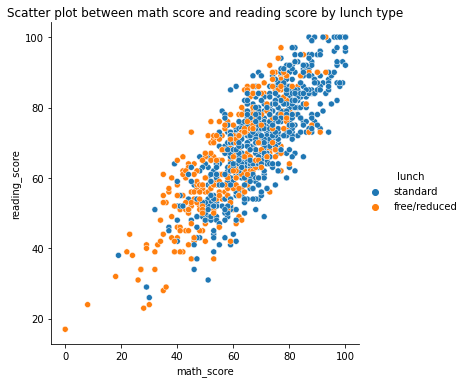

In [62]:
sns.relplot(x = "math_score", y = "reading_score", data=df, hue="lunch")
plt.title("Scatter plot between math score and reading score by lunch type")

Those with a free/reduced lunch are mainly concentrated at the bottom left meaning they have lower scores for both exams

Text(0.5, 1.0, 'Scatter plot between math score and reading score by preparation course')

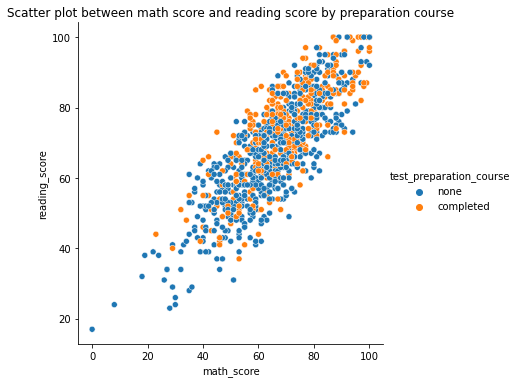

In [65]:
sns.relplot(x = "math_score", y = "reading_score", data=df, hue="test_preparation_course")
plt.title("Scatter plot between math score and reading score by preparation course")

Those who completed a test preparation course are mainly concentrated at the top right meaning they have better scores in both exams

Text(0.5, 1.0, 'Scatter plot between math score and writing score ')

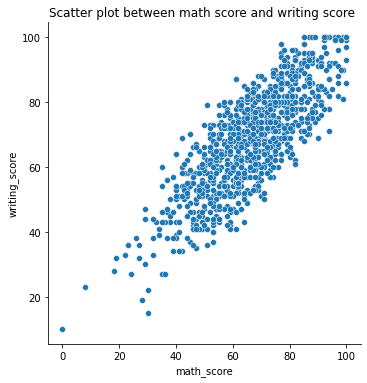

In [67]:
sns.relplot(x = "math_score", y = "writing_score", data=df)
plt.title("Scatter plot between math score and writing score ")

Text(0.5, 1.0, 'Scatter plot between reading score and writing score ')

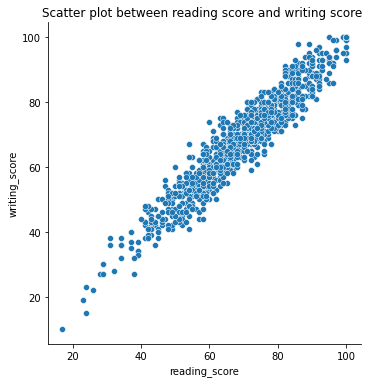

In [68]:
sns.relplot(x = "reading_score", y = "writing_score", data=df)
plt.title("Scatter plot between reading score and writing score ")

Text(0.5, 1.0, 'Scatter plot between reading score and writing score ')

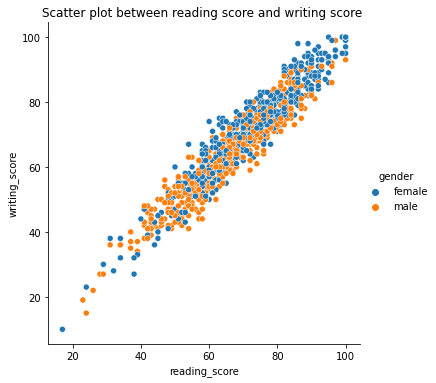

In [70]:
sns.relplot(x = "reading_score", y = "writing_score", data=df, hue="gender")
plt.title("Scatter plot between reading score and writing score ")

Males are mainly concentrated at the bottom left meaning that they have lowest scores in both exams 